<a href="https://colab.research.google.com/github/arpan2233/Deep-Learning/blob/main/Binary_MultiSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# Generate binary classification data
X_binary, y_binary = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split into train & test
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42)


In [3]:
# Generate multi-class classification data (3 classes)
X_multi, y_multi = make_classification(n_samples=200, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split into train & test
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split( X_multi, y_multi, test_size=0.2, random_state=42)


In [4]:
svm_binary = SVC(kernel='linear', C=1.0)
svm_binary.fit(X_train_binary, y_train_binary)
y_pred_binary = svm_binary.predict(X_test_binary)

# Print accuracy
print("Binary SVM Accuracy:", accuracy_score(y_test_binary, y_pred_binary))


Binary SVM Accuracy: 0.85


In [5]:
# One-vs-One (default)
svm_multi_ovo = SVC(kernel='linear', C=1.0, decision_function_shape='ovo')
svm_multi_ovo.fit(X_train_multi, y_train_multi)
y_pred_multi_ovo = svm_multi_ovo.predict(X_test_multi)
print("Multi-Class SVM (One-vs-One) Accuracy:", accuracy_score(y_test_multi, y_pred_multi_ovo))

# One-vs-All (OvA)
svm_multi_ova = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_multi_ova.fit(X_train_multi, y_train_multi)
y_pred_multi_ova = svm_multi_ova.predict(X_test_multi)
print("Multi-Class SVM (One-vs-All) Accuracy:", accuracy_score(y_test_multi, y_pred_multi_ova))


Multi-Class SVM (One-vs-One) Accuracy: 0.825
Multi-Class SVM (One-vs-All) Accuracy: 0.825


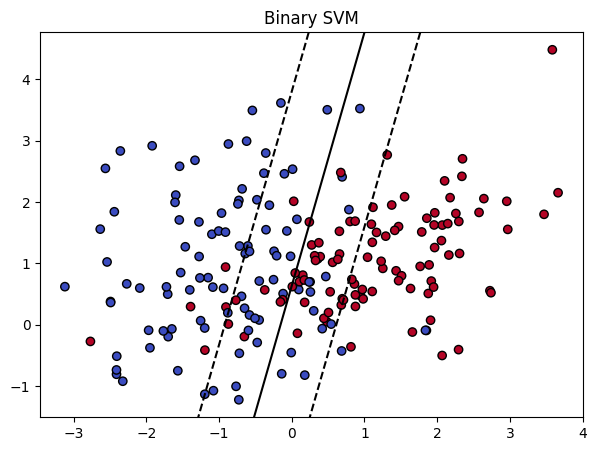

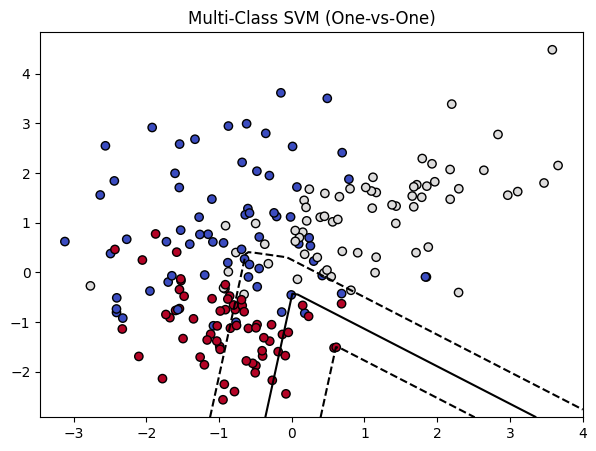

In [8]:
def plot_svm_boundary(model, X, y, title):
    plt.figure(figsize=(7,5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))

    # Get model predictions
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    if Z.ndim > 1:
        Z = Z.max(axis=1)  # Take the max score for each point
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contour(xx, yy, Z, colors='black', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    plt.title(title)
    plt.show()

# Plot Binary SVM
plot_svm_boundary(svm_binary, X_binary, y_binary, "Binary SVM")

# Plot Multi-Class SVM (One-vs-One)
plot_svm_boundary(svm_multi_ovo, X_multi, y_multi, "Multi-Class SVM (One-vs-One)")
